# Faktor Apakah yang Menjual Sebuah Mobil?<a id='intro'></a>

## Pendahuluan <a id='introduction'></a>
Terdapat atusan iklan kendaraan gratis ditayangkan di situs Crankshaft List setiap hari. Saya perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.
Berikut merupakan Deskripsi Data dalam Dataset:
- price
- model_year
- model
- condition
- cylinders
- fuel — gas, disel, dan lain-lain.
- odometer — jarak tempuh kendaraan saat iklan ditayangkan
- transmission
- paint_color
- is_4wd — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- date_posted — tanggal iklan ditayangkan
- days_listed — jumlah hari iklan ditayangkan hingga dihapus

## Tujuan dan Langkah-Langkah Pengerjaan Projek <a id='goals_and_step'></a>

**Tujuan dari proyek ini adalah untuk mengetahui faktor-faktor yang memengaruhi harga sebuah kendaraan dengan melihat korelasi antara harga kendaraan dengan hal-hal lainnya**

**Langkah yang akan saya lakukan**
1. Memeriksa dan mempelajari nilai-nilai yang hilang
2. Memperbaiki data dan mengubah format dan isi data sesuai dengan kebutuhan untuk EDA
3. Melakukan analisis data eksploratif
4. Membuat kesimpulan 

## Konten <a id='content'></a>

* [1.Faktor Apakah yang Menjual Sebuah Mobil?](#intro)
    * [1.1 Pendahuluan](#introduction)
    * [1.2 Tujuan dan Langkah-Langkah Pengerjaan Projek](#goals_and_step)
    * [1.3 Content](#content)
    * [1.4 Pra-pemrosesan](#preprocessing_data)
        * [1.4.1 Memuat Data](#load_data)
        * [1.4.2 Mengeksplorasi Data Awal](#initial_exploration)
        * [1.4.3 Kesimpulan dan Langkah-Langkah Selanjutnya](#initial_summary)
    * [1.5 Mengatasi Nilai-Nilai yang Hilang](#fill_missing_values)
        * [1.5.1 Mengatasi Nilai 'model_year' yang Hilang](#fill_my_missing_values)
        * [1.5.2 Mengatasi Nilai 'cylinder' yang Hilang](#fill_cyl_missing_values)
        * [1.5.3 Mengatasi Nilai 'odometer' yang Hilang](#fill_odo_missing_values)
        * [1.5.4 Mengatasi Nilai 'paint_color' yang Hilang](#fill_color_missing_values)
        * [1.5.5 Mengatasi Nilai 'is_4wd' yang Hilang](#fill_4wd_missing_values)
    * [1.6 Memperbaiki Tipe Data](#change_data_type)
    * [1.7 Memperbaiki Kualitas Data](#improve_data_quality)
    * [1.8 Memeriksa Data yang Sudah Bersih](#check_clean_data)
    * [1.9 Mempelajari Parameter Inti](#crucial_parameter)

    * [1.10 Mempelajari dan Menangani Outlier](#handle_outlier)
    * [1.10.1 Menangani Outlier pada Kolom 'vehicle_age'](#handle_va_outlier)
    * [1.10.2 Menangani Outlier pada Kolom 'price'](#handle_p_outlier)
    * [1.10.3 Menangani Outlier pada Kolom 'odometer'](#handle_odo_outlier)
    * [1.10.4 Menangani Outlier pada Kolom 'cylinders'](#handle_cyl_outlier)
    * [1.10.5 Menangani Outlier pada Kolom 'condition'](#handle_con_outlier)

* [1.11 Mempelajari Parameter Inti Tanpa Outlier](#crucial_parameter_wo_outlier)

* [1.12 Masa Berlaku Iklan](#ads_period)
    * [1.12.1 Visualisasi iklan yang dihapus dengan cepat/lambat](#ads_period_visualisation)
    * [1.12.2 Median dan mean suatu iklan ditayangkan](#ads_mean_median)

* [1.13 Harga Rata-Rata Setiap Jenis Kendaraan](#avg_price)

* [1.14 Faktor Harga](#price_factor) 
    * [1.14.1 Faktor Harga u/ Kendaraan Jenis Truk](#truck_price_factor)
    * [1.14.2 Faktor Harga u/ Kendaraan Jenis SUV](#SUV_price_factor)

* [1.15 Kesimpulan Umum](#summary)

## Pra-pemrosesan<a id='preprocessing_data'>

In [ ]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Memuat Data<a id='load_data'>

In [ ]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal<a id='initial_exploration'>

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [ ]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# tampilkan sampel data
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45379,14950,2012.0,chevrolet silverado,excellent,8.0,gas,141031.0,automatic,truck,blue,1.0,2018-10-20,33


**Masalah pada data:**
1. Terdapat nilai null pada kolom 'model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd'.
2. Terdapat tipe data yang tidak sesuai

**Kolom dengan tipe data yang tidak sesuai:**
1. model_year --> seharusnya integer
2. cylinders --> seharusnya integer
3. is_4wd --> seharusnya boolean
4. date_posted --> seharusnya datetime

**Terdapat nilai hilang pada beberapa kolom yang sudah disebutkan sebelumnya**
Kolom yang memiliki data hilang terbanyak adalah kolom is_4wd. Dikarenakan deskripsi
data yang menyebutkan bahwa kolom 'is_4wd' merupakan tipe boolean, maka ada kemungkinan bahwa nilai yang hilang ini disebabkan karena tipe kendaraan memang bukan 4wd.

### Kesimpulan dan Langkah-Langkah Selanjutnya<a id='initial_summary'>

[Rumuskan kesimpulan Anda tentang data awal. Menurut Anda apa yang terlihat normal dan apa yang tidak?] 
[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini. Khususnya, Anda harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.]

**Kesimpulan awal**

Berdasarkan pengamatan awal dapat disimpulkan bahwa terdapat nilai yang hilang pada beberapa kolom. Nilai yang hilang pada beberapa kolom tampak normal, tetapi terdapat satu kolom yang memiliki nilai hilang hampir 1/2 dari jumlah data dan ini tampaknya janggal. Sejauh ini kesimpulan dan langkahnya masih sama dengan langkah awal. Data yang perlu ditangani menurut saya adalah kolom-kolom dengan nilai yang hilang dan kolom dengan tipe data yang tidak sesuai. Kolom-kolom dengan nilai hilang, seperti tahun kendaraan, silinder kendaraan, odometer, cat kendaraan dan jumlah penggerak roda bisa jadi berhubungan erat/ memiliki korelasi kuat dengan harga sebuah kendaraan bekas

## Mengatasi Nilai-Nilai yang Hilang <a id='fill_missing_values'>

[Pada bagian ini saya akan melihat dan mengatasi nilai yang hilang dan mempertimbangkan cara untuk memperbaikinya.]

### Mengatasi Nilai 'model_year' yang Hilang <a id='fill_my_missing_values'>

In [ ]:
#df[df['model_year'].isnull()]
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [ ]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
df[df['model_year'].isnull() & df['cylinders'].isnull() & df['odometer'].isnull() & df['paint_color'].isnull()].shape

(9, 13)

In [ ]:
df[df['model_year'].isnull() & df['cylinders'].isnull() & df['odometer'].isnull()].shape

(59, 13)

In [ ]:
df[df['model_year'].isnull() & df['cylinders'].isnull()].shape

(363, 13)

In [ ]:
index_myc_null = df[df['model_year'].isnull() & df['cylinders'].isnull()].index
df = df.drop(index_myc_null)

In [ ]:
df[df['model_year'].isnull()].shape

(3256, 13)

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

is_4wd          50.379188
paint_color     18.013369
odometer        15.310191
cylinders        9.571557
model_year       6.364098
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Berdasarkan hasil pengecekan data, dapat dilihat bahwa data yang hilang pada kolom 'model_year' adalah sekitar 6.3%. Berdasarkan hasil ini terdapat 2 hal yang dapat dilakukan, yaitu mendrop data yang hilang atau melakukan pengisian dengan menggunakan median/mean. Disini saya akan melakukan drop data saja karena menurut saya model_year tidak mungkin diisi dengan median. Keputusan ini didasari pada pertimbangan model_year untuk tiap mobil yang berbeda-beda**

In [ ]:
df.dropna(subset = ['model_year'], inplace =True)

###  Mengatasi Nilai 'cylinder' yang Hilang <a id='fill_cyl_missing_values'>

In [ ]:
df['cylinders'].value_counts()

8.0     14705
6.0     14648
4.0     12856
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [ ]:
def brand(model):
    if 'bmw' in model:
        return 'bmw'
    elif 'ford' in model:
        return 'ford'
    elif 'hyundai' in model:
        return 'hyundai'
    elif 'chrysler' in model:
        return 'chrysler'
    elif 'toyota' in model:
        return 'toyota'
    elif 'honda' in model:
        return 'honda'
    elif 'kia' in model:
        return 'kia'
    elif 'chevrolet' in model:
        return 'chevroler'
    elif 'ram' in model:
        return 'ram'
    elif 'gmc' in model:
        return 'gmc'
    elif 'jeep' in model:
        return 'jeep'
    elif 'nissan' in model:
        return 'nissan'
    elif 'subaru' in model:
        return 'subaru'
    elif 'dodge' in model:
        return 'dodge'
    elif 'mercedes-benz' in model:
        return 'benz'
    elif 'acura' in model:
        return 'acura'
    elif 'cadillac' in model:
        return 'cadillac'
    elif 'volkswagen' in model:
        return 'volkswagen'
    elif 'buick' in model:
        return 'buick'

In [ ]:
df['brand'] = df['model'].apply(brand)

In [ ]:
pd.pivot_table(df, index = ['brand', 'model'], values='cylinders', aggfunc=['median', 'mean', 'max', 'min']).reset_index()

,brand,model,median,mean,max,min
,,,cylinders,cylinders,cylinders,cylinders
0,acura,acura tl,6.0,5.970000,6.0,4.0
1,benz,mercedes-benz benze sprinter 2500,6.0,6.000000,6.0,6.0
2,bmw,bmw x5,6.0,6.389610,8.0,6.0
3,buick,buick enclave,6.0,6.000000,8.0,4.0
4,cadillac,cadillac escalade,8.0,7.992537,8.0,6.0
...,...,...,...,...,...,...
95,toyota,toyota sienna,6.0,5.956364,8.0,4.0
96,toyota,toyota tacoma,6.0,5.344165,8.0,4.0
97,toyota,toyota tundra,8.0,7.922330,10.0,4.0


In [ ]:
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [ ]:
df = fill_missing_value_median(df, 'model', 'cylinders')

### Mengatasi Nilai 'odometer' yang Hilang <a id='fill_odo_missing_values'>

In [ ]:
df['odometer'].value_counts()

0.0         172
140000.0    169
130000.0    162
120000.0    160
200000.0    153
           ... 
199455.0      1
120108.0      1
99199.0       1
133992.0      1
269527.0      1
Name: odometer, Length: 16900, dtype: int64

In [ ]:
df['model_year'].unique()

array([2011., 2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

In [ ]:
def model_year_category(model_year):
    if model_year < 1940 :
        return 'Under 1940'
    elif model_year < 1970 :
        return '1970 - 1940'
    elif model_year < 2000 :
        return '2000 - 1970'
    elif model_year < 2010 :
        return '2010 - 2000'
    elif model_year < 2020 :
        return '2020 - 2010'

In [ ]:
df['model_year_category'] = df['model_year'].apply(model_year_category)

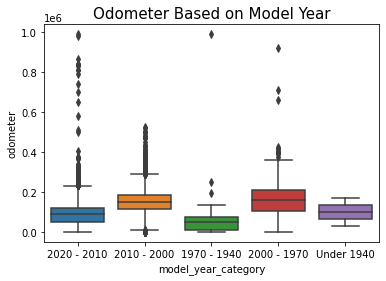

In [ ]:
sns.boxplot(x ='model_year_category', y ='odometer', data = df)
plt.title('Odometer Based on Model Year', fontsize = 15)
plt.show()

**Menurut analisa saya nilai kolom 'odometer' suatu kendaraan dapat ditentukan berdasarkan usia dari kendaraan tersebut, sehingga saya membuat satu kolom untuk mengelompokan model_year kedalam suatu kateogori. Berdasarkan visualisasi boxplot terdapat outlier pada setiap kategori, sehingga untuk pengisian data odometer yang hilang akan dilakukan menggunakan nilai median**

In [ ]:
df['odometer_clean'] = df['odometer']

In [ ]:
df = fill_missing_value_median(df, 'model_year_category', 'odometer_clean')

### Mengatasi Nilai 'paint_color' yang Hilang <a id='fill_color_missing_values'>

In [ ]:
df['paint_color'].value_counts()

white     9324
black     7176
silver    5811
grey      4686
blue      4143
red       4138
green     1278
brown     1120
custom    1074
yellow     239
orange     207
purple      95
Name: paint_color, dtype: int64

**Menurut analisa saya kolom 'paint_color' yang hilang ini mungkin dapat disebabkan beberapa hal:**
1. Pilihan warna yang tidak tersedia pada form
2. Warna yang tidak umum karena setiap brand umumnya memiliki penamaan warna yang berbeda-beda sehingga warna tidak dapat diidentifikasi oleh individu yang menginput data

**Berdasarkan pertimbangan tersebut, nilai yang hilang pada kolom 'paint_color' akan diisi dengan nilai unknown**

In [ ]:
df[df['paint_color'].isnull()].sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,model_year_category,odometer_clean
22493,6495,2010.0,ford escape,excellent,6.0,gas,127000.0,automatic,SUV,NaN,1.0,2018-07-27,7,ford,2020 - 2010,127000.0
34883,13500,1973.0,chevrolet corvette,good,8.0,gas,45000.0,manual,coupe,NaN,NaN,2018-12-16,39,chevroler,2000 - 1970,45000.0
16482,16999,2006.0,chevrolet corvette,excellent,8.0,gas,91724.0,automatic,convertible,NaN,NaN,2018-10-29,16,chevroler,2010 - 2000,91724.0
6089,9490,2012.0,chevrolet cruze,excellent,4.0,gas,88113.0,automatic,sedan,NaN,NaN,2018-05-01,22,chevroler,2020 - 2010,88113.0
42882,4999,1994.0,chevrolet silverado 1500,excellent,8.0,gas,90692.0,automatic,pickup,NaN,NaN,2018-08-12,28,chevroler,2000 - 1970,90692.0
44753,4600,2015.0,nissan altima,excellent,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-27,47,nissan,2020 - 2010,88000.0
15917,19649,2017.0,ram 2500,excellent,8.0,gas,115588.0,automatic,truck,NaN,1.0,2018-05-21,59,ram,2020 - 2010,115588.0
26474,13999,2015.0,dodge charger,good,6.0,gas,65179.0,automatic,sedan,NaN,NaN,2019-02-28,40,dodge,2020 - 2010,65179.0
51402,22000,2003.0,chevrolet silverado 2500hd,excellent,8.0,gas,53000.0,automatic,pickup,NaN,1.0,2018-10-13,27,chevroler,2010 - 2000,53000.0
46078,8900,2007.0,gmc yukon,excellent,8.0,gas,171594.0,automatic,SUV,NaN,1.0,2018-05-26,26,gmc,2010 - 2000,171594.0


In [ ]:
df['paint_color'].fillna('unknown', inplace = True)

In [ ]:
df['is_4wd'].value_counts()

1.0    23764
Name: is_4wd, dtype: int64

In [ ]:
df[df['is_4wd'].isnull()].sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,model_year_category,odometer_clean
25947,1900,2003.0,ford ranger,good,6.0,gas,295000.0,automatic,truck,unknown,NaN,2019-01-24,30,ford,2010 - 2000,295000.0
8702,15800,2008.0,toyota highlander,excellent,6.0,gas,131563.0,automatic,SUV,unknown,NaN,2019-02-15,73,toyota,2010 - 2000,131563.0
26413,10000,2013.0,nissan altima,excellent,4.0,gas,50000.0,automatic,sedan,white,NaN,2018-09-01,57,nissan,2020 - 2010,50000.0
45224,15500,2010.0,cadillac escalade,like new,8.0,gas,NaN,automatic,SUV,white,NaN,2019-04-04,53,cadillac,2020 - 2010,88000.0
10559,7500,2004.0,chevrolet silverado,fair,8.0,gas,NaN,automatic,truck,white,NaN,2018-05-02,5,chevroler,2010 - 2000,149640.5


**Melalui data tersebut dapat dilihat bahwa nilai unik pada kolom 'is_4wd' hanya berisi 1 nilai, yaitu 1. Setelah melakukan research mengenai beberapa data mobil yang diambil secara acak didapatkan bahwa nilai NaN ini adalah nilai bagi mobil AWD(All Wheel Drive), FWD(Front Wheel Drive), ataupun RWD (Rear Wheel Drive). Sehingga nilai hilang pada kolom 'is_4wd' dapat diisi menjadi nilai boolean, yaitu 'False'.**

In [ ]:
df['is_4wd'].fillna(0, inplace = True)

## Memperbaiki Tipe Data <a id='change_data_type'>

[Pada bagian ini saya memperbaiki tipe data yang tidak sesuai.]

In [ ]:
df['model_year'] = df['model_year'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('bool')
df['cylinders'] = df['cylinders'].astype('int')
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [ ]:
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,model_year_category,odometer_clean
40696,5900,2008,chevrolet silverado 1500,good,8,gas,283200.0,automatic,pickup,silver,True,2018-11-07,56,chevroler,2010 - 2000,283200.0


In [ ]:
df.dtypes

price                           int64
model_year                      int64
model                          object
condition                      object
cylinders                       int64
fuel                           object
odometer                      float64
transmission                   object
type                           object
paint_color                    object
is_4wd                           bool
date_posted            datetime64[ns]
days_listed                     int64
brand                          object
model_year_category            object
odometer_clean                float64
dtype: object

## Memperbaiki Kualitas Data <a id='improve_data_quality'>

[Pada bagian ini saya memberikan faktor tambahan pada data agar lebih mudah dianalisis.]

In [ ]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['day_posted'] = df['date_posted'].dt.day
df['weekday_posted'] = df['date_posted'].dt.weekday

In [ ]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['year_posted'] = df['date_posted'].dt.year
df['vehicle_age'] = df['year_posted'] - df['model_year']

In [ ]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['odometer_per_year'] = (df['odometer']/df['vehicle_age'])

In [ ]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def condition_in_number(value):
    if value == 'new':
        result = 5
    elif value == 'like new':
        result = 4
    elif value == 'excellent':
        result = 3
    elif value == 'good':
        result = 2
    elif value == 'fair':
        result = 1
    else:
        result = 0
    return result

In [ ]:
df['condition_in_number'] = df['condition'].apply(condition_in_number)

In [ ]:
df = df.reset_index(drop = True)

## Memeriksa Data yang Sudah Bersih <a id='check_clean_data'>

[Disini saya melakukan pengecekan ulang terhadap data yang sudah dibersihkan untuk memastikan datanya sudah bersih.]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47906 entries, 0 to 47905
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                47906 non-null  int64         
 1   model_year           47906 non-null  int64         
 2   model                47906 non-null  object        
 3   condition            47906 non-null  object        
 4   cylinders            47906 non-null  int64         
 5   fuel                 47906 non-null  object        
 6   odometer             40563 non-null  float64       
 7   transmission         47906 non-null  object        
 8   type                 47906 non-null  object        
 9   paint_color          47906 non-null  object        
 10  is_4wd               47906 non-null  bool          
 11  date_posted          47906 non-null  datetime64[ns]
 12  days_listed          47906 non-null  int64         
 13  brand                47906 non-

In [ ]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.describe()

,price,model_year,cylinders,odometer,days_listed,odometer_clean,day_posted,weekday_posted,year_posted,vehicle_age,odometer_per_year,condition_in_number
count,47906.000000,47906.000000,47906.000000,40563.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,40561.0,47906.000000
mean,12160.465203,2009.750470,6.121843,115425.444099,39.564835,115238.429101,15.461320,3.003987,2018.307435,8.556966,inf,2.638605
std,10082.453773,6.282065,1.656820,65219.802462,28.201967,61248.172049,8.736614,1.998414,0.461436,6.295266,NaN,0.711839
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2018.000000,0.000000,0.0,0.000000
25%,5000.000000,2006.000000,4.000000,70000.000000,19.000000,79000.000000,8.000000,1.000000,2018.000000,4.000000,10797.2,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.000000,110406.500000,15.000000,3.000000,2018.000000,7.000000,15387.5,3.000000
75%,16900.000000,2014.000000,8.000000,155000.000000,53.000000,149640.500000,23.000000,5.000000,2019.000000,12.000000,22692.5,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000,990000.000000,31.000000,6.000000,2019.000000,110.000000,inf,5.000000


In [ ]:
# tampilkan sampel data 
df.sample(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,brand,model_year_category,odometer_clean,day_posted,weekday_posted,year_posted,vehicle_age,odometer_per_year,condition_in_number
13093,10500,2005,gmc sierra 1500,excellent,8,gas,NaN,automatic,pickup,black,...,0,gmc,2010 - 2000,149640.5,6,2,2019,14,NaN,3
21214,115000,2012,ford f-250 super duty,good,8,diesel,225000.0,automatic,truck,white,...,53,ford,2020 - 2010,225000.0,8,5,2018,6,37500.000,2
44148,8900,2010,chevrolet camaro,excellent,6,gas,100761.0,automatic,coupe,silver,...,26,chevroler,2020 - 2010,100761.0,13,2,2018,8,12595.125,3


## Mempelajari Parameter Inti <a id='crucial_parameter'>
[Pada bagian ini saya akan membuat visualisasi histrogram untuk mempelajari nilai dari parameter inti]

Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

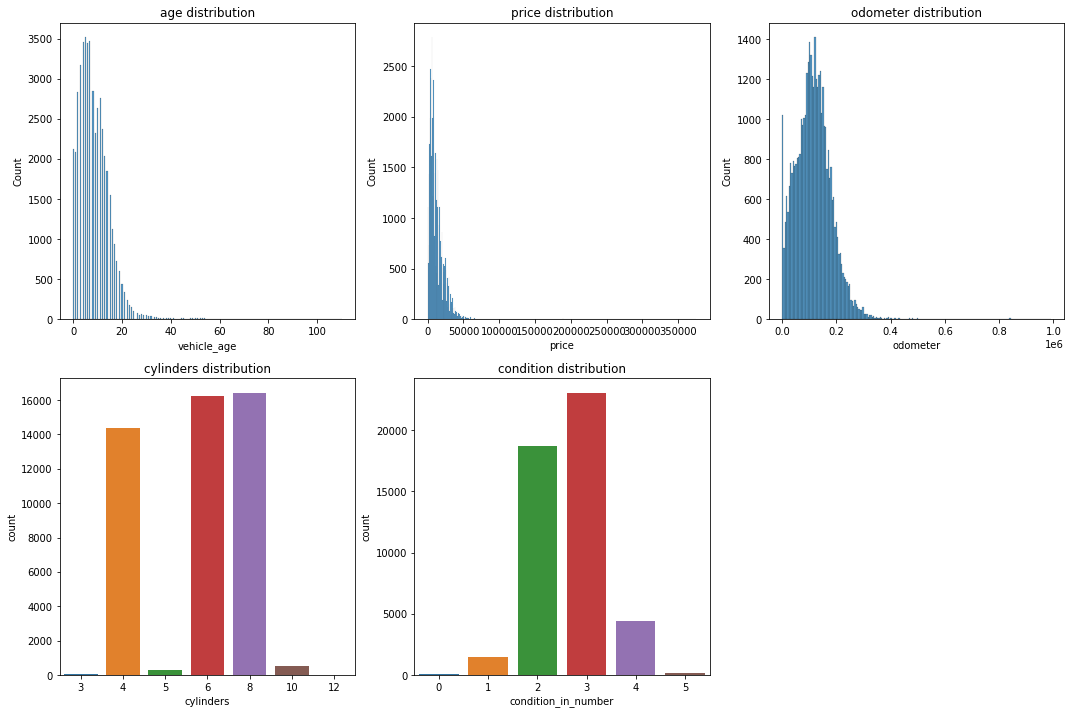

In [ ]:
#
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
age = df.loc[df['vehicle_age'] <= df['vehicle_age'], 'vehicle_age']
plt.title('age distribution')
sns.histplot(data = age)

plt.subplot(2, 3, 2)
price = df.loc[df['price'] <= df['price'], 'price']
plt.title('price distribution')
sns.histplot(data = price)

plt.subplot(2, 3, 3)
odometer = df.loc[df['odometer'] <= df['odometer'], 'odometer']
plt.title('odometer distribution')
sns.histplot(data = odometer)

plt.subplot(2, 3, 4)
plt.title('cylinders distribution')
sns.countplot(df['cylinders'])

plt.subplot(2, 3, 5)
plt.title('condition distribution')
sns.countplot(df['condition_in_number'])

plt.show()


Berdasarkan visualisasi data histogram diatas dapat dilihat bahwa outlier sangat mempengaruhi pembacaan hasil pada histogram **'age distribution', 'price distribution', dan 'odometer distribution**. Sedangkan pada histrogram **cylinders distribution dan condition distribution** tidak terlalu terpengaruh karena variasi data cenderung rendah. Tetapi mungkin tetap dapat dicari apakah terdapat outlier pada kedua kolom tersebut.

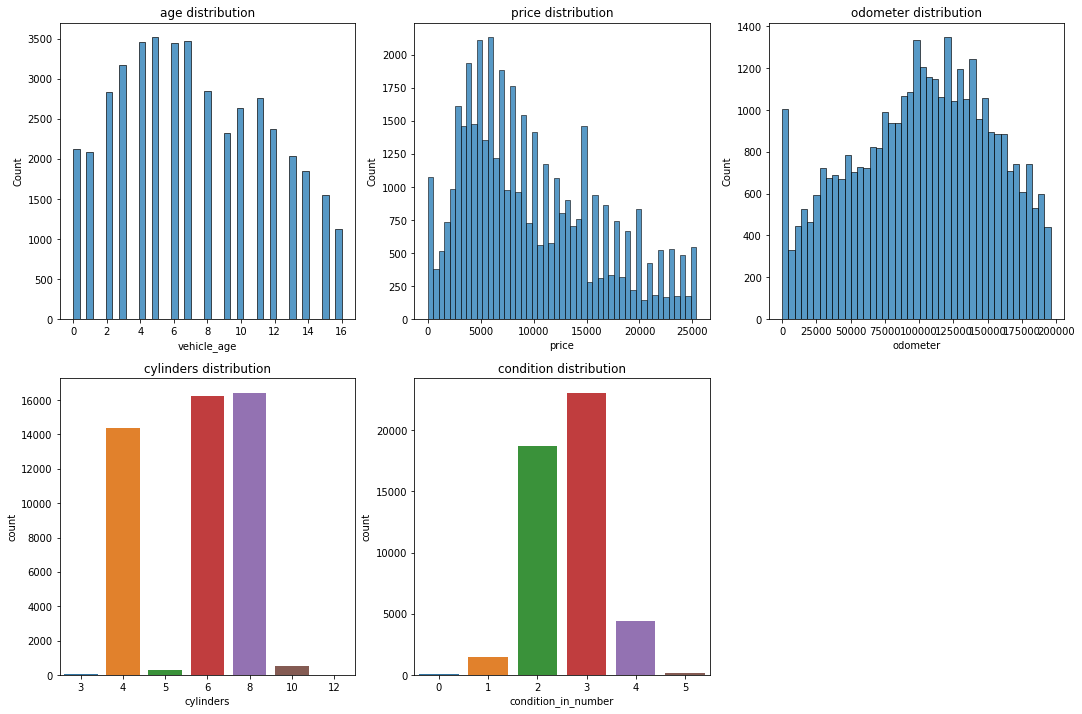

In [ ]:
#
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
age = df.loc[df['vehicle_age'] <= df['vehicle_age'].quantile(0.90), 'vehicle_age']
plt.title('age distribution')
sns.histplot(data = age)

plt.subplot(2, 3, 2)
price = df.loc[df['price'] <= df['price'].quantile(0.90), 'price']
plt.title('price distribution')
sns.histplot(data = price)

plt.subplot(2, 3, 3)
odometer = df.loc[df['odometer'] <= df['odometer'].quantile(0.90), 'odometer']
plt.title('odometer distribution')
sns.histplot(data = odometer)

plt.subplot(2, 3, 4)
plt.title('cylinders distribution')
sns.countplot(df['cylinders'])

plt.subplot(2, 3, 5)
plt.title('condition distribution')
sns.countplot(df['condition_in_number'])

plt.show()


## Mempelajari dan Menangani Outlier <a id='handle_outlier'>

[Berdasarkan hasil di atas, terdapat beberapa kolom apa yang berisi *outlier*, selanjutnya saya akan membuatl sebuah DataFrame tanpa *outlier* tersebut.]

**Kolom yang berisi outlier adalah kolom:**

1. vehicle_age
2. price
3. odometer

### Menangani Outlier pada Kolom 'vehicle_age' <a id='handle_va_outlier'>

In [ ]:
# Tentukan batas bawah outlier 
Q1_age = df['vehicle_age'].quantile(0.25)
Q3_age = df['vehicle_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_whisker_age = Q1_age - (1.5 * IQR_age)

In [ ]:
# Tentukan batas atas outlier 
upper_whisker_age = Q3_age + (1.5 * IQR_age)

In [ ]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_new = df[(df['vehicle_age']> lower_whisker_age) & 
                      (df['vehicle_age']< upper_whisker_age)].reset_index(drop=True)

In [ ]:
df_new.shape

(47019, 22)

### Menangani Outlier pada Kolom 'price' <a id='handle_p_outlier'>

In [ ]:
# Tentukan batas bawah outlier 
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_whisker_price = Q1_price - (1.5 * IQR_price)

In [ ]:
# Tentukan batas atas outlier 
upper_whisker_price = Q3_price + (1.5 * IQR_price)

In [ ]:
df_new = df_new[(df_new['price']> lower_whisker_price) & 
                (df_new['price']< upper_whisker_price)].reset_index(drop=True)

In [ ]:
df_new.shape

(45506, 22)

### Menangani Outlier pada Kolom 'odometer' <a id='handle_odo_outlier'>

In [ ]:
# Tentukan batas bawah outlier 
Q1_odo = df['odometer'].quantile(0.25)
Q3_odo = df['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo
lower_whisker_odo = Q1_odo - (1.5 * IQR_odo)

In [ ]:
# Tentukan batas atas outlier 
upper_whisker_odo = Q3_odo + (1.5 * IQR_odo)

In [ ]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_new = df_new[(df_new['odometer']> lower_whisker_odo) & 
                (df_new['odometer']< upper_whisker_odo)].reset_index(drop=True)

In [ ]:
df_new.shape

(38112, 22)

### Menangani Outlier pada Kolom 'cylinders' <a id='handle_cyl_outlier'>

In [ ]:
Q1_cylinders = df['cylinders'].quantile(0.25)
Q3_cylinders = df['cylinders'].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders
lower_whisker_cylinders = Q1_cylinders - (1.5 * IQR_cylinders)
upper_whisker_cylinders = Q3_cylinders + (1.5 * IQR_cylinders)
df_new = df_new[(df_new['cylinders']> lower_whisker_cylinders) & 
                (df_new['cylinders']< upper_whisker_cylinders)].reset_index(drop=True)
df_new.shape

(38112, 22)

### Menangani Outlier pada Kolom 'condition' <a id='handle_con_outlier'>

In [ ]:
Q1_condition = df['condition_in_number'].quantile(0.25)
Q3_condition = df['condition_in_number'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
lower_whisker_condition = Q1_condition - (1.5 * IQR_condition)
upper_whisker_condition = Q3_condition + (1.5 * IQR_condition)
df_new = df_new[(df_new['condition_in_number']> lower_whisker_condition) & 
                (df['condition_in_number']< upper_whisker_condition)].reset_index(drop=True)
df_new.shape

(37922, 22)

## Mempelajari Parameter Inti Tanpa Outlier <a id='crucial_parameter_wo_outlier'>

[Saya akan menggunakan data yang telah difilter untuk membuat grafik baru. Lalu membandingkan dengan data sebelumnya (yang berisi *outlier*) untuk menarik kesimpulan.]

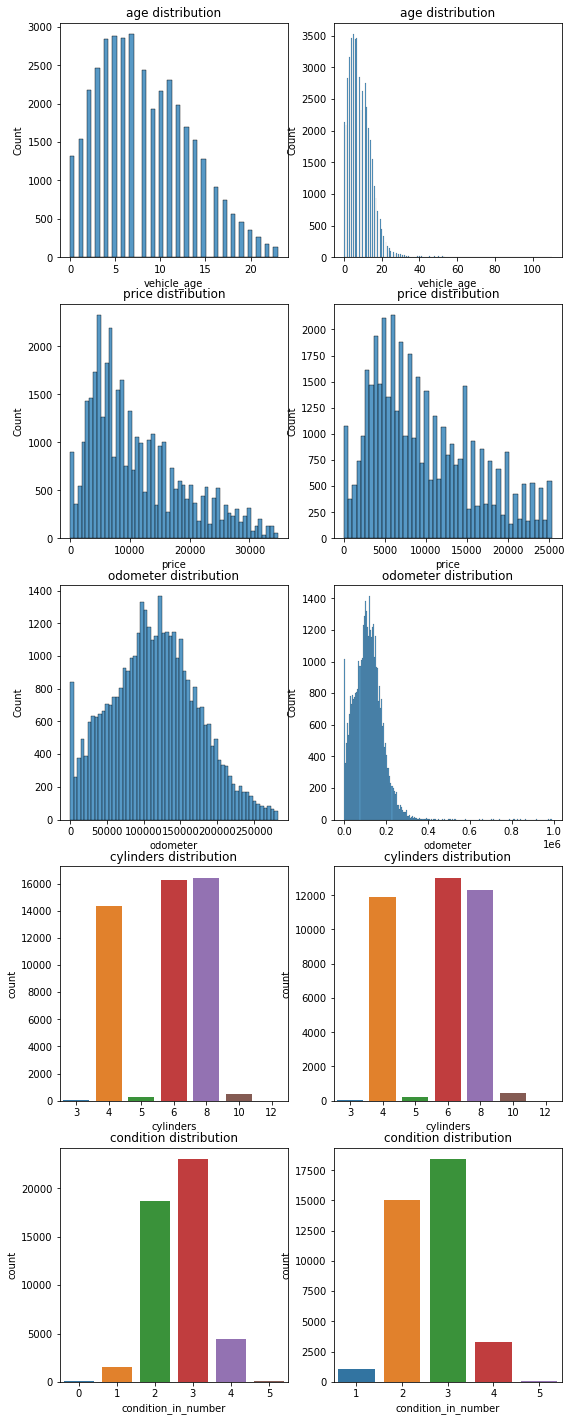

In [ ]:
plt.figure(figsize=(9, 25))

plt.subplot(5, 2, 1)
age = df_new.loc[
    df_new['vehicle_age'] <= df_new['vehicle_age'], 'vehicle_age']
plt.title('age distribution')
sns.histplot(data = age)

plt.subplot(5, 2, 2)
age = df.loc[df['vehicle_age'] <= df['vehicle_age'], 'vehicle_age']
plt.title('age distribution')
sns.histplot(data = age)

plt.subplot(5, 2, 3)
price = df_new.loc[
    df_new['price'] <= df_new['price'], 'price']
plt.title('price distribution')
sns.histplot(data = price)

plt.subplot(5, 2, 4)
price = df.loc[df['price'] <= df['price'].quantile(0.90), 'price']
plt.title('price distribution')
sns.histplot(data = price)

plt.subplot(5, 2, 5)
odometer = df_new.loc[
    df_new['odometer'] <= df_new['odometer'], 'odometer']
plt.title('odometer distribution')
sns.histplot(data = odometer)

plt.subplot(5, 2, 6)
odometer = df.loc[df['odometer'] <= df['odometer'], 'odometer']
plt.title('odometer distribution')
sns.histplot(data = odometer)

plt.subplot(5, 2, 7)
plt.title('cylinders distribution')
sns.countplot(df['cylinders'])

plt.subplot(5, 2, 8)
plt.title('cylinders distribution')
sns.countplot(df_new['cylinders'])

plt.subplot(5, 2, 9)
plt.title('condition distribution')
sns.countplot(df['condition_in_number'])

plt.subplot(5, 2, 10)
plt.title('condition distribution')
sns.countplot(df_new['condition_in_number'])
plt.show()

Berdasarkan visualisasi data histogram diatas dapat  pada histogram **'age distribution', 'price distribution', dan 'odometer distribution** memiliki distribusi miring ke kanan yang dimana artinya terdapat lebih banyak mobil yang umur, harga dan odometernya berada dibawah nilai rata-ratanya. Sedangkan pada histrogram **cylinders distribution** dapat terlihat bahwa tidak terdapat outlier. Pada histogram **condition distribution** memiliki distribusi kurtosis positif yang artinya sebagian besar mobil yang dijual berada pada kondisi **'excelent dan good'** tersebut.

## Masa Berlaku Iklan <a id='ads_period'>
[Pada bagian ini saya akan menghitung rata-rata dan median dari kolom 'days_listed' untuk menemukan insight terkait datanya dan mencari berapa lama umumnya sebuah iklan ditayangkan. Saya juga akan menganalisis kapan iklan dihapus dengan cepat dan ditayangkan dalam waktu yang sangat lama.]

In [ ]:
df['days_listed'].value_counts()

18     903
24     892
19     876
22     867
20     864
      ... 
168      1
199      1
261      1
217      1
223      1
Name: days_listed, Length: 223, dtype: int64

Karena tipe datanya sangat banyak maka disini saya akan menambahkan kategori dengan asumsi:
1. **days_listed <= 15 = fast**
2. **days_listed <= 54 = average**
3. **days_listed > 54 = average**

In [ ]:
def days_listed_category(days):
    if days <= 40:
        return 'fast'
    elif days > 40:
        return 'slow'

In [ ]:
df['days_listed_category'] = df['days_listed'].apply(days_listed_category)

### Visualisasi iklan yang dihapus dengan cepat/lambat <a id='ads_period_visualisation'>

In [ ]:
df_fast = df[df['days_listed_category'] == "fast"]

In [ ]:
df_fast['transmission'].value_counts()

automatic    26413
manual        1612
other         1044
Name: transmission, dtype: int64

In [ ]:
df_slow = df[df['days_listed_category'] == "slow"]

In [ ]:
df_slow['transmission'].value_counts()

automatic    17179
manual        1030
other          628
Name: transmission, dtype: int64

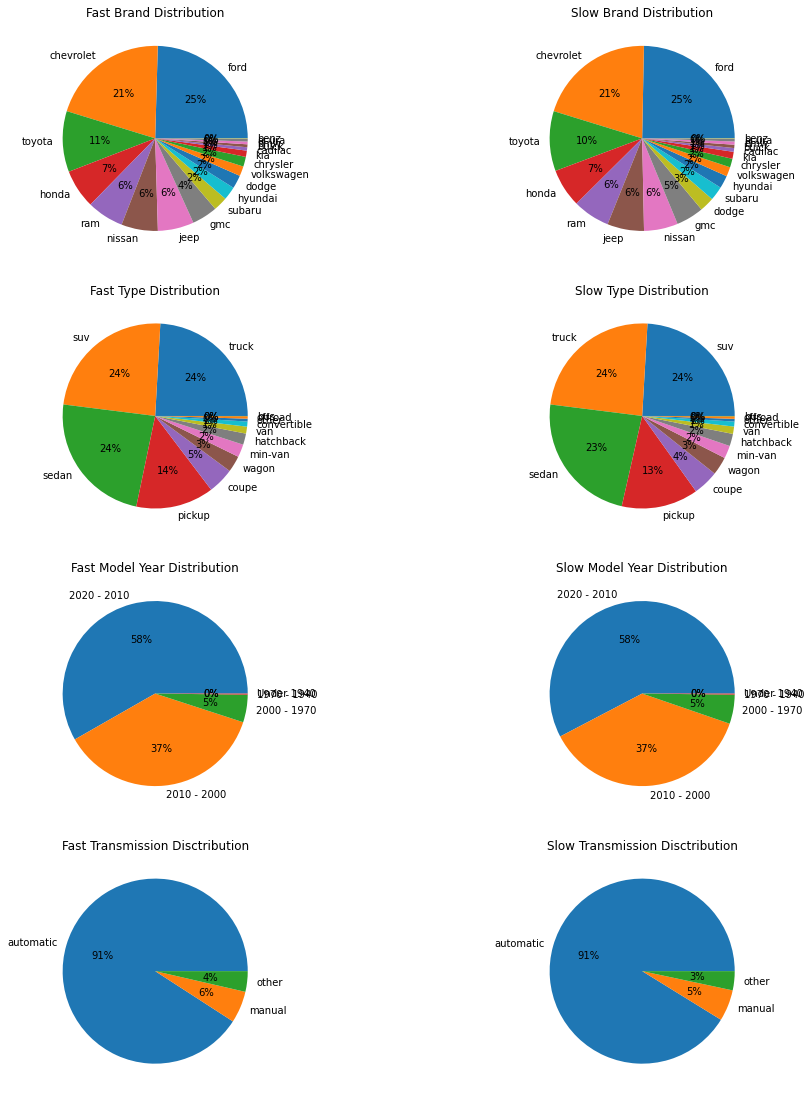

In [ ]:
plt.figure(figsize=(16, 40))

brand_label = ['ford', 'chevrolet', 'toyota', 'honda', 'ram', 'nissan',  'jeep', 'gmc',
               'subaru', 'hyundai', 'dodge', 'volkswagen', 'chrysler', 'kia', 'cadilac', 
               'buick', 'bmw', 'acura', 'benz']

type_label = ['truck', 'suv', 'sedan', 'pickup', 'coupe', 'wagon', 'min-van', 'hatchback',
              'van', 'convertible', 'other', 'offroad', 'bus']

model_year_label = ['2020 - 2010', '2010 - 2000', '2000 - 1970', '1970 - 1940', 'Under 1940']

transmission_label = ['automatic', 'manual', 'other']

brand_label_s = ['ford', 'chevrolet', 'toyota', 'honda', 'ram', 'jeep', 'nissan', 'gmc',
               'dodge','subaru', 'hyundai', 'volkswagen', 'chrysler', 'kia', 'cadilac',
               'buick', 'bmw', 'acura', 'benz']

type_label_s = ['suv', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'min-van', 'hatchback',
              'van', 'convertible', 'other', 'offroad', 'bus']

model_year_label_s = ['2020 - 2010', '2010 - 2000', '2000 - 1970', '1970 - 1940', 'Under 1940']

transmission_label_s = ['automatic', 'manual', 'other']


plt.subplot(8, 2, 1)
plt.pie(df_fast['brand'].value_counts(), labels = brand_label, autopct='%.0f%%')
plt.title('Fast Brand Distribution')

plt.subplot(8, 2, 2)
plt.pie(df_slow['brand'].value_counts(), labels = brand_label_s, autopct='%.0f%%')
plt.title('Slow Brand Distribution')

plt.subplot(8, 2, 3)
plt.pie(df_fast['type'].value_counts(), labels = type_label, autopct='%.0f%%')
plt.title('Fast Type Distribution')

plt.subplot(8, 2, 4)
plt.pie(df_slow['type'].value_counts(), labels = type_label_s, autopct='%.0f%%')
plt.title('Slow Type Distribution')

plt.subplot(8, 2, 5)
plt.pie(df_fast['model_year_category'].value_counts(), labels = model_year_label, autopct='%.0f%%')
plt.title('Fast Model Year Distribution')

plt.subplot(8, 2, 6)
plt.pie(df_slow['model_year_category'].value_counts(), labels = model_year_label_s, autopct='%.0f%%')
plt.title('Slow Model Year Distribution')

plt.subplot(8, 2, 7)
plt.pie(df_fast['transmission'].value_counts(), labels = transmission_label, autopct='%.0f%%')
plt.title('Fast Transmission Disctribution')

plt.subplot(8, 2, 8)
plt.pie(df_slow['transmission'].value_counts(), labels = transmission_label_s, autopct='%.0f%%')
plt.title('Slow Transmission Disctribution')

plt.show()

**Findings:** 
- Berdasarkan visualisasi distribusi 'brand', 'type', 'model_year_category', dan 'transmission' tidak ditemukan ditemukan hal yang mempengaruhi iklan lebih cepat dihapus atau tidak

### Median dan mean suatu iklan ditayangkan <a id='ads_mean_median'>

mean: 40.0
median: 33.0
min: 0
max: 271
Mode: 18
Q3: 53.0
95%: 94.0


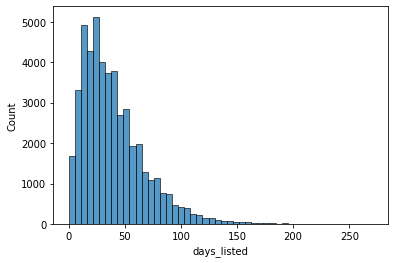

In [ ]:
print('mean:', round(df['days_listed'].mean(), 0))
print('median:', df['days_listed'].median())
print('min:', df['days_listed'].min())
print('max:', df['days_listed'].max())
print('Mode:', df['days_listed'].mode()[0])
print('Q3:', df['days_listed'].quantile(0.75))
print('95%:', df['days_listed'].quantile(0.95))
sns.histplot(df['days_listed'], bins=50)
plt.show()

**Findings:**
- Mean dari distribusi data days listed adalah 40 hari sedangkan Mediannya adalah 33 hari.
- Distribusinya skew/miring ke kanan atau banyak mobil yang dijual di atas durasi mean nya.


**Insights:**
- Ternyata cukup tunggu 40 mobil sudah bisa laku
- 50% kemungkinan mobil laku dalam 30 hari.
- 75% kemungkinan mobil laku dalam 53 hari.
- 95% kemungkinan mobil laku dalam 94 hari.

## Harga Rata-Rata Setiap Jenis Kendaraan <a id='avg_price'>

[Pada bagian ini saya melakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Selanjutnya saya akan membuat grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan.]

In [ ]:
agg_group_1 = df.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns = {
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type', ascending = False)

agg_group_1

,avg_price,count_type
type,,
truck,16753.880090,11517
SUV,11162.924256,11486
sedan,6995.972758,11306
pickup,16169.763880,6484
coupe,14340.695551,2158
wagon,9089.562544,1431
mini-van,8145.328372,1075
hatchback,6892.285421,974
van,10286.612795,594


Text(0, 0.5, 'average price per type')

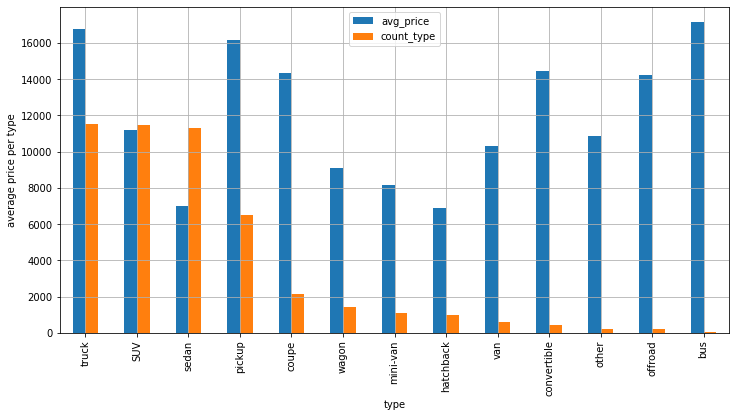

In [ ]:
agg_group_1.plot(kind='bar', grid = True, figsize = (12,6))
plt.ylabel('average price per type')

**Insights:**
- Berdasarkan tabel agg_group_1 dapat dilihat bahwa tipe kendaraan dengan harga tertinggi adalah bus lalu diikuti oleh truck
- Tetapi berdasarkan visualisasi dapat dilihat bahwa jumlah iklan terbanyak dimiliki oleh truck dan suv, sedangkan jumlah iklan kendaraan dengan jenis bus memiliki jumlah iklan yang kurang dari 1000 sehingga mungkin saja harga rata-ratanya tidak valid.

## Faktor Harga <a id='price_factor'>

[Apakah faktor yang paling memengaruhi harga kendaraan? Ambil masing-masing jenis kendaraan populer yang Anda temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buatlah grafik *boxplot* untuk variabel kategorik (jenis transmisi dan warna), lalu buatlah *scatterplot* untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.]

### Faktor Harga u/ Kendaraan Jenis Truk <a id='truck_price_factor'>

In [ ]:
df_truck = df_new[df_new['type'] == 'truck'].reset_index(drop=True)
df_truck_include_condition = df_truck[df_truck['condition'] != 'new']
index_color_truck = list(df_truck['paint_color'].value_counts()[:-2].index)
df_truck_include_color = df_truck[df_truck['paint_color'].isin(index_color_truck)]

In [ ]:
df_truck['condition'].value_counts()

excellent    3953
good         3880
like new      662
fair          274
new            13
Name: condition, dtype: int64

In [ ]:
df_truck['transmission'].value_counts()

automatic    8344
manual        289
other         149
Name: transmission, dtype: int64

In [ ]:
df_truck['paint_color'].value_counts()

white      2642
unknown    1499
black      1092
red         773
silver      766
grey        650
blue        647
custom      248
green       191
brown       173
yellow       56
orange       35
purple       10
Name: paint_color, dtype: int64

In [ ]:
df_truck_include_condition['condition'].value_counts()

excellent    3953
good         3880
like new      662
fair          274
Name: condition, dtype: int64

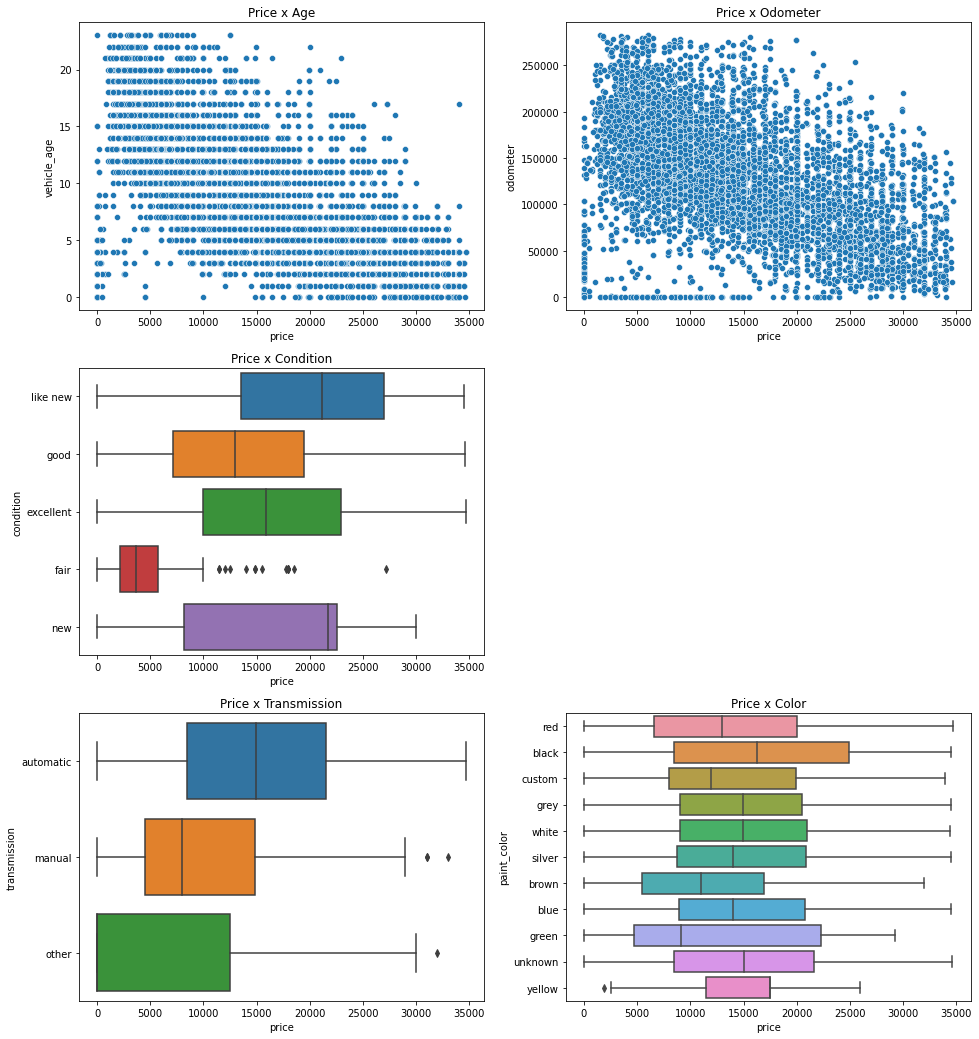

In [ ]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 2, 1)
sns.scatterplot(data = df_truck, x='price', y = 'vehicle_age')
plt.title('Price x Age')

plt.subplot(3, 2, 2)
sns.scatterplot(data = df_truck, x='price', y = 'odometer')
plt.title('Price x Odometer')

plt.subplot(3, 2, 3)
sns.boxplot(data = df_truck, x='price', y = 'condition')
plt.title('Price x Condition')

plt.subplot(3, 2, 5)
sns.boxplot(data = df_truck, x='price', y = 'transmission')
plt.title('Price x Transmission')

plt.subplot(3, 2, 6)
sns.boxplot(data = df_truck_include_color, x='price', y = 'paint_color')
plt.title('Price x Color')

plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan beberapa hal:
- Semakin **muda umur** kendaraan jenis truck, harganya akan semakin tinggi
- Semakin **rendah odometer** kendaraan jenis truck, harganya akan semakin tinggi
- Semakin **bagus kondisi** kendaraan jenis truck, harganya akan semakin tinggi.
- Kendaraan jenis truck dengan **tipe tranmisi otomatis** memiliki harga rata-rata paling tinggi dibandingkan dengan jenis manual dan other
- Kendaraan jenis truck dengan **warna hitam** memiliki harga rata-rata paling tinggi dibandingkan dengan warna lainnya

### Faktor Harga u/ Kendaraan Jenis SUV <a id='SUV_price_factor'>

In [ ]:
df_SUV = df_new[df_new['type'] == 'SUV'].reset_index(drop=True)
df_SUV_include_condition = df_SUV[df_SUV['condition'] != 'new']
index_color_SUV = list(df_SUV['paint_color'].value_counts()[:-2].index)
df_SUV_include_color = df_SUV[df_SUV['paint_color'].isin(index_color_SUV)]

In [ ]:
df_SUV['condition'].value_counts()

excellent    4917
good         3293
like new      864
fair          215
new            13
Name: condition, dtype: int64

In [ ]:
df_SUV['transmission'].value_counts()

automatic    8829
manual        349
other         124
Name: transmission, dtype: int64

In [ ]:
df_SUV['paint_color'].value_counts()

unknown    1671
black      1643
white      1461
silver     1207
grey        899
blue        779
red         692
green       319
brown       275
custom      231
orange       63
yellow       32
purple       30
Name: paint_color, dtype: int64

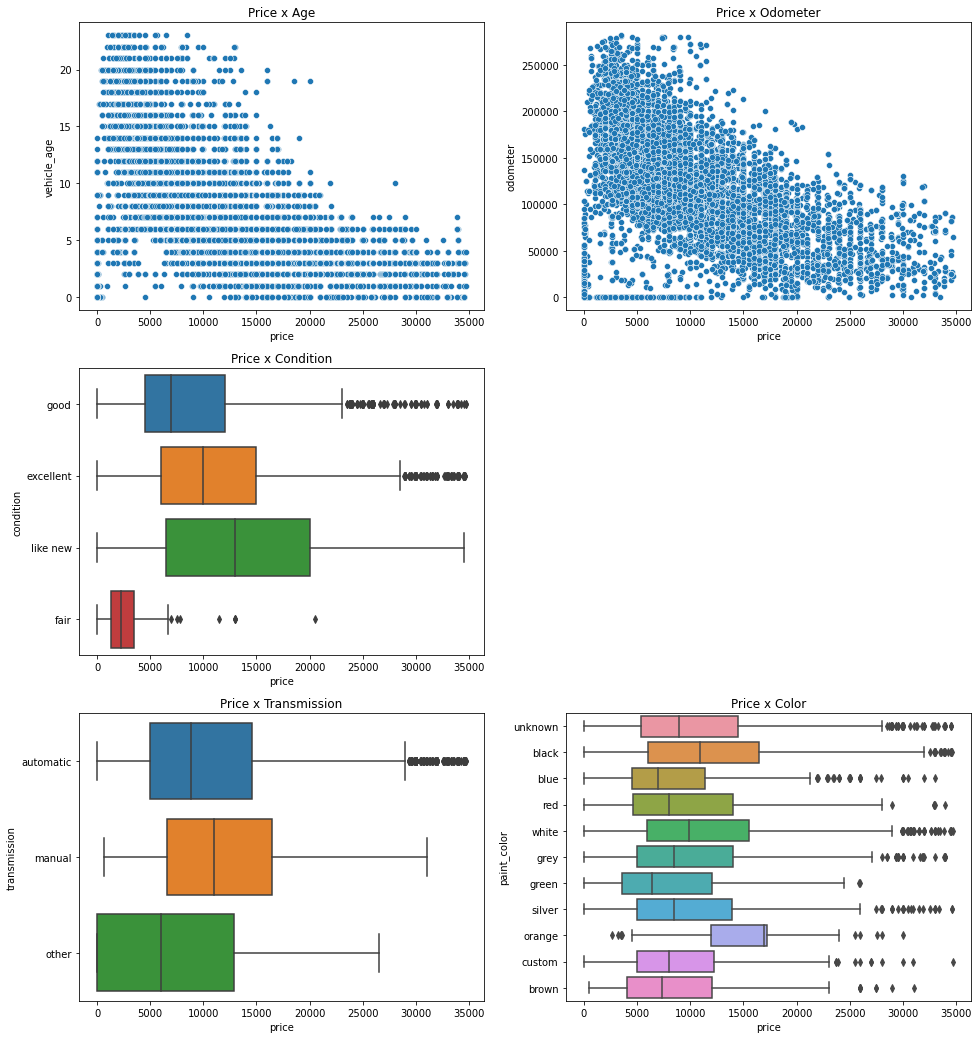

In [ ]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 2, 1)
sns.scatterplot(data = df_SUV, x='price', y = 'vehicle_age')
plt.title('Price x Age')

plt.subplot(3, 2, 2)
sns.scatterplot(data = df_SUV, x='price', y = 'odometer')
plt.title('Price x Odometer')

plt.subplot(3, 2, 3)
sns.boxplot(data = df_SUV_include_condition, x='price', y = 'condition')
plt.title('Price x Condition')

plt.subplot(3, 2, 5)
sns.boxplot(data = df_SUV, x='price', y = 'transmission')
plt.title('Price x Transmission')

plt.subplot(3, 2, 6)
sns.boxplot(data = df_SUV_include_color, x='price', y = 'paint_color')
plt.title('Price x Color')

plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan beberapa hal:
- Semakin **muda umur** kendaraan jenis SUV, harganya akan semakin tinggi
- Semakin **rendah odometer** kendaraan jenis SUV, harganya akan semakin tinggi
- Semakin **bagus kondisi** kendaraan jenis SUV, harganya akan semakin tinggi.
- Kendaraan jenis SUV dengan **tipe tranmisi manual** memiliki harga rata-rata paling tinggi dibandingkan dengan jenis manual dan other
- Kendaraan jenis SUV dengan **warna orange** memiliki harga rata-rata paling tinggi dibandingkan dengan warna lainnya

## Kesimpulan Umum <a id='summary'>

**Pra pemrosesan data:**
- Pada bagian pra pemrosesan data saya melakukan pengisian data yang hilang bergantung pada nilai kolomnya (contohnya pada kolom cylinders nilai yang hilang diisi berdasarkan model kendaraan).
- Saya juga melakukan dropna untuk baris yang memiliki banyak nilai kolom yang hilang.
- Beberapa data juga diperbaiki tipenya agar dapat dilakukan operasi.
- Kualitas data juga diperbaiki dan dikelompokkan agar lebih mudah dalam melakukan analisis data

**EDA**
- Saya memulai dengan menentukan parameter yang ingin dilakukan eksplorasi dan dilanjutkan dengan menangani outliernya
- Saat mempelajari data inti, saya  mendapati bahwa histogram 'age distribution', 'price distribution', dan 'odometer distribution memiliki distribusi miring ke kanan yang dimana artinya terdapat lebih banyak mobil yang umur, harga dan odometernya berada dibawah nilai rata-ratanya.Sedangkan, pada histogram condition distribution memiliki distribusi kurtosis positif yang artinya sebagian besar mobil yang dijual berada pada kondisi 'excelent dan good' tersebut.
- Selain itu saya juga melakukan analisi masa berlaku iklan dan berdasarkan visualisasi distribusi 'brand', 'type', 'model_year_category', dan 'transmission' tidak ditemukan ditemukan hal yang mempengaruhi iklan lebih cepat dihapus atau tidak. 
- Rata-rata kendaraan terjual dalam 30 hari setelah iklan ditayangkan
- Saat mengamati Berdasarkan tabel agg_group_1 dapat dilihat bahwa tipe kendaraan dengan harga tertinggi adalah bus lalu diikuti oleh truck. Tetapi berdasarkan visualisasi dapat dilihat bahwa jumlah iklan terbanyak dimiliki oleh truck dan suv, sedangkan jumlah iklan kendaraan dengan jenis bus memiliki jumlah iklan yang kurang dari 1000 sehingga mungkin saja harga rata-ratanya tidak valid.

Based on the findings, the marketing team can consider the following recommendations:
1. Offer pricing guidance: With an average waiting time of 40 days and a 75% chance of selling a car within 53 days, Crankshaft List can offer pricing guidance to its users to help them sell their vehicles more quickly. This can include providing data on average prices for similar vehicles, as well as offering tips on how to price a vehicle competitively.
2. Highlight important vehicle features: Based on the finding that vehicles with lower odometers, better condition, and younger age tend to have higher prices, Crankshaft List should encourage sellers to highlight these features in their ads. This can include providing guidance on how to take good photos of a vehicle's interior and exterior, as well as offering tips on how to highlight important maintenance and repair work.
3. Expand to other vehicle categories: While trucks and SUVs make up the majority of ads on Crankshaft List, the company may want to consider expanding into other types or categories. This can help to diversify the company's offerings and attract new users to the website.
